<a href="https://colab.research.google.com/github/saritmaitra/Historical-price-index/blob/master/Forecasting_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In recent years, the investors pay major attention to invest in gold market
because of huge profits in the future. Gold is the only commodity which maintains
its value even in the economic and financial crisis. Also, the gold prices are closely
related with other commodities. The future gold price prediction becomes the warning
system for the investors due to unforeseen risk in the market. Hence, an accurate gold
price forecasting is required to foresee the business trends. This paper concentrates on
forecasting the future gold prices from four commodities like historical data’s of gold
prices, silver prices, Crude oil prices, Standard and Poor’s 500 stock index (S&P500)
index and foreign exchange rate. The period used for the study is from 1st January
2000 to 31st April 2014. In this paper, a learning algorithm for single hidden layered
Feed forward neural networks called Extreme Learning Machine (ELM) is used which
has good learning ability. Also, this study compares the five models namely Feed
forward networks without feedback, Feed forward back propagation networks, Radial
basis function, ELMAN networks and ELM learning model. The results prove that
the ELM learning performs better than the other methods.

The gold prices are closely related with other commodities. A hike in oil prices will have positive impact on gold prices and vice versa. When there is a hike in equities, gold prices goes down. This is because when there is a boom in the stock market, the investors tend to invest the gold money in the equities. Hence, an accurate gold price forecasting is required to foresee the business trends in future.

This paper concentrates on forecasting the future gold prices from four commodities like
historical data’s of gold prices, silver prices, Crude oil prices, Standard & Poor’s 500 stock index (NYSE) index and foreign exchange rate.

In this paper, a learning algorithm for single hidden layered Feed forward neural networks called Extreme Learning Machine (ELM) is used which has good learning ability. Also, this study compares the three models namely Feed forward networks without feedback, Feed forward back propagation networks and ELM learning model.

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

Quantitative Analysis
Loading all datasets ( Gold, Silver, Crude Oil, USD, Interest rate and Stock index)
- Date : in days
- Open : price of the stock at the opening of the trading (in US dollars)
- High : highest price of the stock during the trading day (in US dollars)
- Low : lowest price of the stock during the trading day (in US dollars)
- Close : price of the stock at the closing of the trading (in US dollars)
- Volume : amount of stocks traded (in US dollars)
- Adj Close : price of the stock at the closing of the trading adjusted with dividends (in US dollars)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Gold.csv to Gold.csv


In [4]:
# Import Gold data in panda and passed to a variable name "df1"
df1 = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)
df1= df1.rename(columns={'Open': 'Gold'})
df1.head()

,Gold,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300


In [0]:
df1.tail()

,Gold,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-23,12.02,12.24,11.96,11.96,11.919285,13787100
2019-05-24,12.00,12.00,11.75,11.95,11.909319,11025500
2019-05-28,11.70,11.85,11.65,11.74,11.700034,10656200
2019-05-29,11.73,11.97,11.73,11.75,11.710000,11073100
2019-05-30,11.76,11.87,11.66,11.79,11.790000,9272600


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Silver.csv to Silver.csv


In [6]:
# Import Silver data in panda and passed to a variable name "df2"
df2 = pd.read_csv("Silver.csv", parse_dates = True, index_col=0)
df2= df2.rename(columns={'Price': 'Silver'})
df2.head()

,Silver,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,5.335,5.290,5.290,5.290,0.00K,-1.44%
2000-01-05,5.170,5.170,5.170,5.170,-,-3.09%
2000-01-06,5.127,5.127,5.127,5.127,-,-0.83%
2000-01-07,5.150,5.150,5.150,5.150,0.05K,0.45%
2000-01-10,5.145,5.145,5.145,5.145,0.06K,-0.10%


In [0]:
df2.tail()

,Silver,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-01,17.070,17.025,17.085,17.020,-,0.06%
2018-01-02,17.121,17.155,17.160,17.125,0.03K,0.30%
2018-01-03,17.185,17.080,17.160,17.080,0.00K,0.37%
2018-01-04,17.189,17.085,17.230,17.085,0.03K,0.02%
2018-01-05,17.205,17.205,17.205,17.205,0.00K,0.09%


In [7]:
from google.colab import files
uploaded = files.upload()

Saving USD_Index.csv to USD_Index.csv


In [8]:
# Import USD data in panda and passed to a variable name "df3"
df3 = pd.read_csv("USD_Index.csv", parse_dates = True, index_col=0)
df3 = df3.rename(columns={'Price': 'USD'})
df3.head()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-03,99.89,101.39,101.57,99.85,2.62K,-1.62%
2000-01-04,100.10,100.18,100.37,99.70,1.00K,0.21%
2000-01-05,100.05,100.09,100.16,99.40,0.89K,-0.05%
2000-01-06,100.34,100.05,100.48,99.60,1.55K,0.29%
2000-01-07,100.50,100.18,100.70,100.16,2.85K,0.16%


In [0]:
df3.tail()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-05-27,97.477,97.430,97.665,97.420,2.94K,0.00%
2019-05-28,97.842,97.605,97.865,97.570,13.14K,0.37%
2019-05-29,98.035,97.795,98.100,97.750,12.41K,0.20%
2019-05-30,98.053,98.040,98.195,98.000,-,0.02%
2019-05-31,97.877,98.060,98.075,97.857,-,-0.18%


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Crude_Oil.csv to Crude_Oil.csv


In [10]:
# Import Oil data in panda and passed to a variable name "df4"
df4 = pd.read_csv("Crude_Oil.csv", parse_dates = True, index_col=0)
df4 = df4.rename(columns={'Price': 'Oil'})
df4.head()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%
2000-01-10,24.67,24.22,24.75,24.02,68.90K,1.86%


In [0]:
df4.tail()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-05-27,59.16,58.77,59.26,58.14,-,0.66%
2019-05-28,59.14,58.94,59.57,58.13,1.02M,-0.03%
2019-05-29,58.81,59.07,59.14,56.88,1.12M,-0.56%
2019-05-30,56.59,59.12,59.70,56.33,820.33K,-3.77%
2019-05-31,55.09,56.00,56.22,54.87,-,-2.65%


In [11]:
from google.colab import files
uploaded = files.upload()

Saving Interest_Rate.csv to Interest_Rate.csv


In [12]:
# Import Interest data in panda and passed to a variable name "df5"
df5 = pd.read_csv("Interest_Rate.csv", parse_dates = True, index_col=0)
df5 = df5.rename(columns={'Open': 'Interest'})
df5.head()

,Interest,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6.377,6.440,6.377,6.435,6.435,0.0
2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0


In [0]:
df5.tail()

,Interest,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-23,2.361,2.364,2.294,2.296,2.296,0.0
2019-05-24,2.315,2.334,2.308,2.324,2.324,0.0
2019-05-28,2.299,2.299,2.264,2.268,2.268,0.0
2019-05-29,2.231,2.247,2.210,2.236,2.236,0.0
2019-05-30,2.261,2.276,2.226,2.227,2.227,0.0


In [13]:
from google.colab import files
uploaded = files.upload()

Saving Stock_Index.csv to Stock_Index.csv


In [14]:
# Import Stock data in panda and passed to a variable name "df6"
df6 = pd.read_csv("Stock_Index.csv", parse_dates = True, index_col=0)
df6 = df6.rename(columns={'Open': 'Stock'})
df6.head()

,Stock,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6876.100098,6876.100098,6876.100098,6876.100098,6876.100098,0
2000-01-03,6762.109863,6762.109863,6762.109863,6762.109863,6762.109863,0
2000-01-04,6543.759766,6543.759766,6543.759766,6543.759766,6543.759766,0
2000-01-05,6567.029785,6567.029785,6567.029785,6567.029785,6567.029785,0
2000-01-06,6635.439941,6635.439941,6635.439941,6635.439941,6635.439941,0


In [15]:
dataset = pd.concat([df1.Gold, df2.Silver, df3.USD, df4.Oil, df5.Interest, df6.Stock], axis=1) # combining dataframes
dataset.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
1999-12-31,17.9375,NaN,NaN,NaN,6.377,6876.100098
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941


In [16]:
df = dataset.loc['20000101':'20180501'] 
df.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941
2000-01-07,17.8125,5.150,100.50,24.22,6.545,6792.669922


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5130 entries, 2000-01-03 to 2018-05-01
Data columns (total 6 columns):
Gold        4611 non-null float64
Silver      5000 non-null float64
USD         4695 non-null float64
Oil         4653 non-null float64
Interest    4607 non-null float64
Stock       4611 non-null float64
dtypes: float64(6)
memory usage: 280.5 KB


In [0]:
df.isnull().sum() # missing values

Gold        519
Silver      130
USD         435
Oil         477
Interest    523
Stock       519
dtype: int64

In [17]:
data= df.fillna(method ='pad') # filling the missing values with previous ones 
data.isnull().sum()

Gold        0
Silver      1
USD         0
Oil         1
Interest    0
Stock       0
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5130 entries, 2000-01-03 to 2018-05-01
Data columns (total 6 columns):
Gold        5130 non-null float64
Silver      5129 non-null float64
USD         5130 non-null float64
Oil         5129 non-null float64
Interest    5130 non-null float64
Stock       5130 non-null float64
dtypes: float64(6)
memory usage: 280.5 KB


In [18]:
# making new data frame with dropped NA values 
new_data = data.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(data), "\nNew data frame length:",  
       len(new_data), "\nNumber of rows with at least 1 NA value: ", 
       (len(data)-len(new_data))) 

Old data frame length: 5130 
New data frame length: 5129 
Number of rows with at least 1 NA value:  1


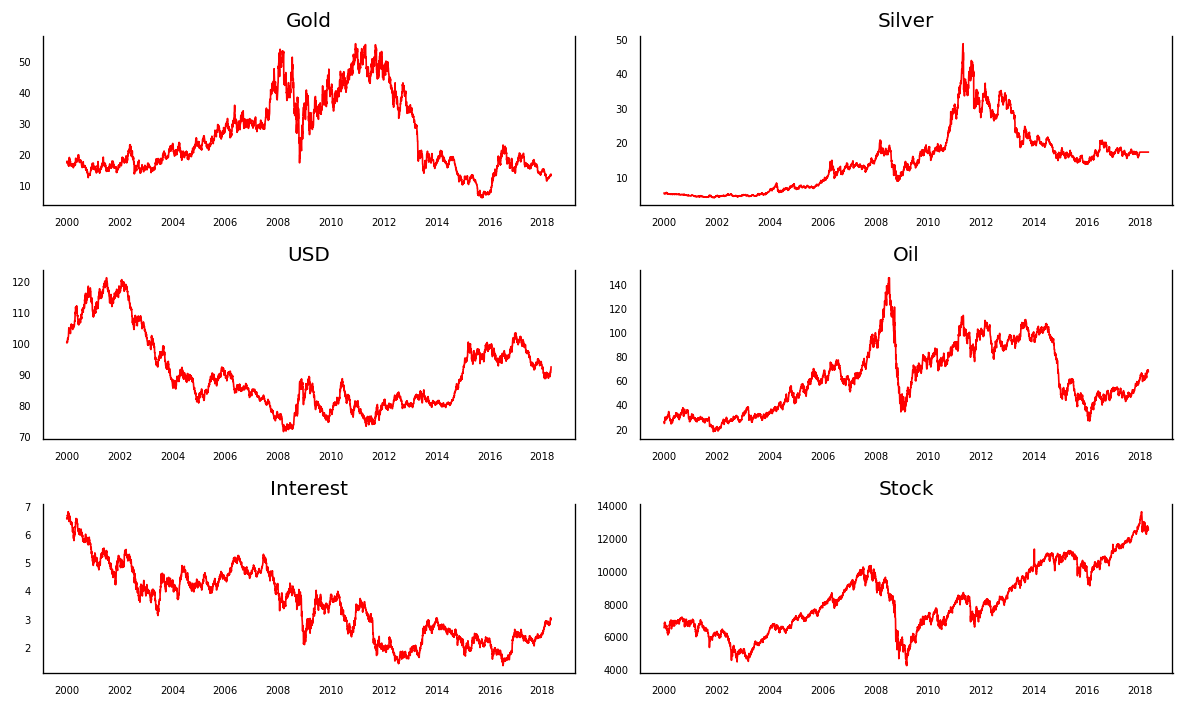

In [0]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = new_data[new_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(new_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [0]:
#from matplotlib import pyplot
#values = new_data.values
# specify columns to plot
#groups = [0, 1, 2, 3, 5]
#i = 1
# plot each column
#pyplot.figure()
#for group in groups:
#	pyplot.subplot(len(groups), 1, i)
#	pyplot.plot(values[:, group])
#	pyplot.title(new_data.columns[group], y=0.5, loc='right')
#	i += 1
#pyplot.show()

To extract maximum information from our data, it is important to have a normal or Gaussian distribution of the data. To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.

In [0]:
from scipy import stats
stat,p = stats.normaltest(new_data.Gold)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
  print('Data looks Gaussian (fail to reject H0)')
else:
  print('Data do not look Gaussian (reject H0)')


Statistics=658.293, p=0.000
Data do not look Gaussian (reject H0)


The skewness and the kurtosis of our data is visualized

In [0]:
print('Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_data.Gold)))
print('Skewness of normal distribution: {}'. format(stats.skew(new_data.Gold)))

Kurtosis of normal distribution: -0.7547875128340102
Skewness of normal distribution: 0.6561298945285786


In [0]:
print('Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_data.Oil)))
print('Skewness of normal distribution: {}'. format(stats.skew(new_data.Oil)))

Kurtosis of normal distribution: -0.952968295311079
Skewness of normal distribution: 0.287951093274376


This two distribution gives us some intuition about the normal distribution of our data. A value close to 0 for Kurtosis indicates a Normal Distribution where asymmetrical nature is signified by a value between -0.5 and +0.5 for skewness. The tails are heavier for kurtosis greater than 0 and vice versa. Moderate skewness refers to the value between -1 and -0.5 or 0.5 and 1.

count    5129.000000
mean       25.828860
std        12.218568
min         6.080000
25%        16.379999
50%        20.700001
75%        34.980000
max        55.540001
Name: Gold, dtype: float64

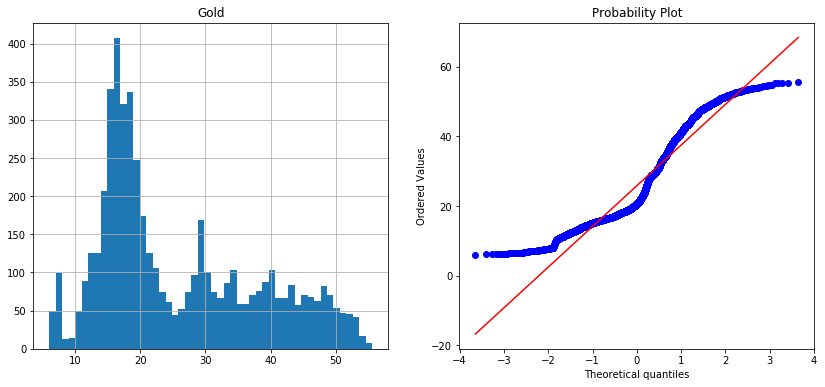

In [0]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
new_data['Gold'].hist(bins=50)
plt.title('Gold')
plt.subplot(1,2,2)
stats.probplot(new_data['Gold'], plot=plt);
new_data.Gold.describe().T

Normal probability plot also shows the data is far from normally distributed.

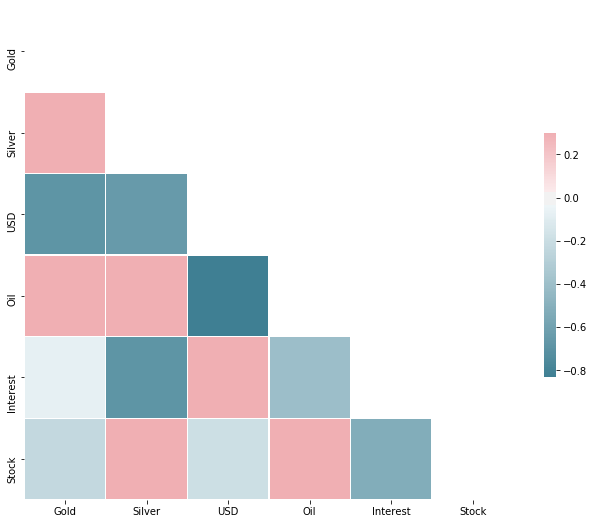

In [0]:
# Compute the correlation matrix
corr = new_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

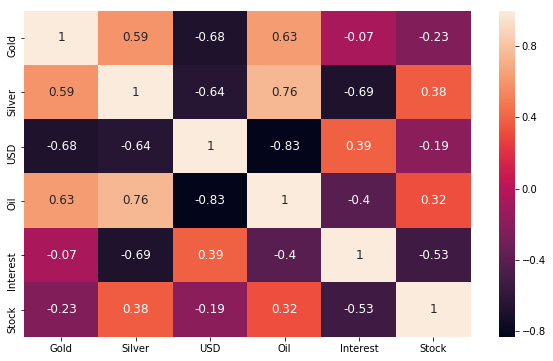

In [0]:
corr = new_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Steps to build VAR model
- Ingest the series
- Train/validation/test split
- Exploratory data analysis on training set
- Stationarity test
- Transform the series
- Build a model on transformed series
- Model diagnostic
- Model selection (based on pre-defined criteria)
- Conduct forecast using the final, chosen model
- Inverse transform the forecast
- Conduct forecast evaluation

### Train_test split
Spliting the training data and test data. The training data will be the first 4,000 data points of the time series and 1,129 will be test data.

In [0]:
train_data = new_data[:4000]
test_data = new_data[4000:1129]

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2000-01-04 to 2014-08-26
Data columns (total 6 columns):
Gold        4000 non-null float64
Silver      4000 non-null float64
USD         4000 non-null float64
Oil         4000 non-null float64
Interest    4000 non-null float64
Stock       4000 non-null float64
dtypes: float64(6)
memory usage: 218.8 KB


### Autocorrelation

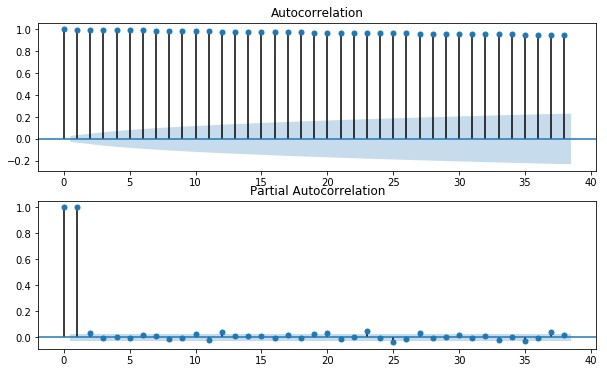

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6)) # Gold acf & pacf on training data
ax[0] = plot_acf(new_data.Gold, ax=ax[0])
ax[1] = plot_pacf(new_data.Gold, ax=ax[1])

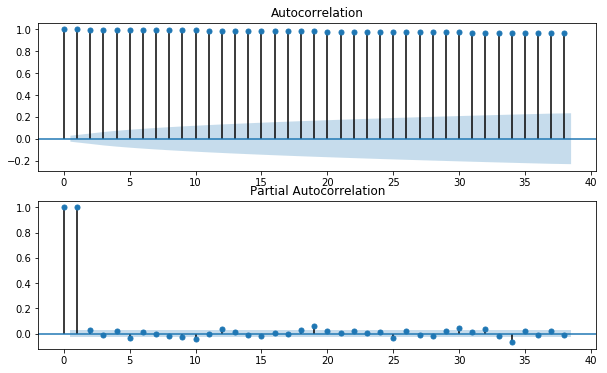

In [0]:
fig, ax = plt.subplots(2, figsize=(10,6)) # Silver acf & pacf on training data
ax[0] = plot_acf(new_data.Silver, ax=ax[0])
ax[1] = plot_pacf(new_data.Silver, ax=ax[1])

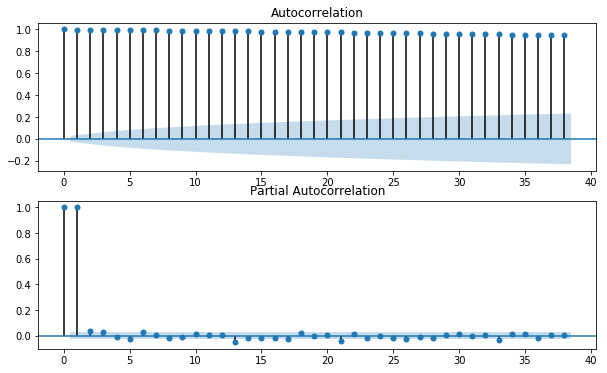

In [0]:
fig, ax = plt.subplots(2, figsize=(10,6)) # Oil acf & pacf on training data
ax[0] = plot_acf(new_data.Oil, ax=ax[0])
ax[1] = plot_pacf(new_data.Oil, ax=ax[1])

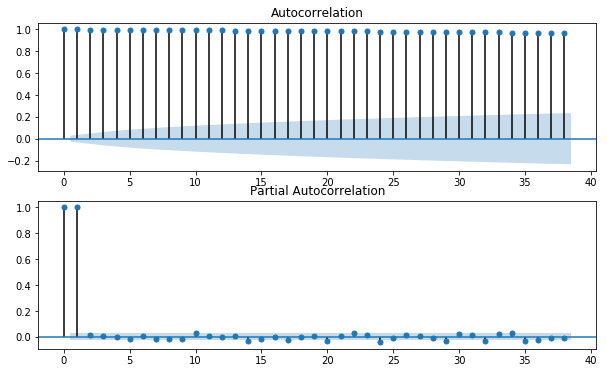

In [0]:
fig, ax = plt.subplots(2, figsize=(10,6)) # USD acf & pacf on training data
ax[0] = plot_acf(new_data.USD, ax=ax[0])
ax[1] = plot_pacf(new_data.USD, ax=ax[1])

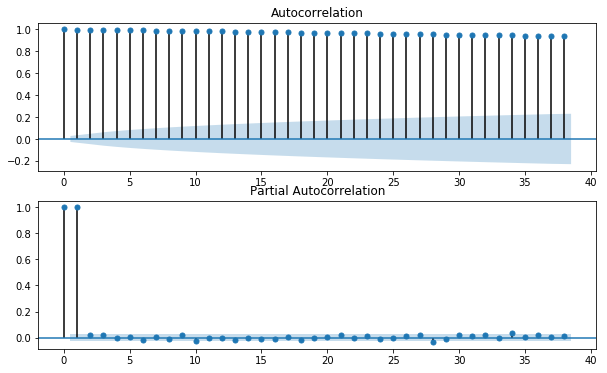

In [0]:
fig, ax = plt.subplots(2, figsize=(10,6)) # Interest acf & pacf on training data
ax[0] = plot_acf(new_data.Interest, ax=ax[0])
ax[1] = plot_pacf(new_data.Interest, ax=ax[1])

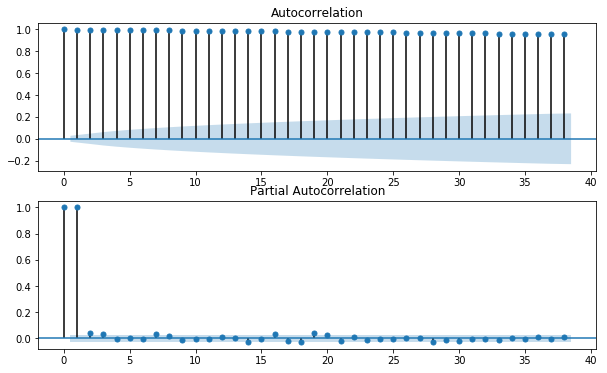

In [0]:
fig, ax = plt.subplots(2, figsize=(10,6)) # Silver acf & pacf on training data
ax[0] = plot_acf(new_data.Stock, ax=ax[0])
ax[1] = plot_pacf(new_data.Stock, ax=ax[1])

### Transformation

Applying 1st differencing or seasonaldifferencing  to the log of the series should make all 6 series stationary:

log (yt) - log (y(t-l)) = log(yt/y(t-l)), here l is some lag


In [0]:
transform_data = np.log(new_data).diff(1)
transform_data.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.014337,-0.031416,-0.000500,-0.025368,-0.001379,0.003550
2000-01-06,0.010620,-0.008352,0.002894,-0.005232,0.005658,0.010363
2000-01-07,0.003515,0.004476,0.001593,-0.022858,-0.001984,0.023419
2000-01-10,-0.021277,-0.000971,0.001491,0.018409,-0.000764,0.006717


In [0]:
DATA = transform_data.dropna()
DATA.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-05,0.014337,-0.031416,-0.000500,-0.025368,-0.001379,0.003550
2000-01-06,0.010620,-0.008352,0.002894,-0.005232,0.005658,0.010363
2000-01-07,0.003515,0.004476,0.001593,-0.022858,-0.001984,0.023419
2000-01-10,-0.021277,-0.000971,0.001491,0.018409,-0.000764,0.006717
2000-01-11,0.000000,0.000971,-0.003882,0.043623,0.009132,-0.009399


In [0]:
DATA = transform_data.dropna()
DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5128 entries, 2000-01-05 to 2018-05-01
Data columns (total 6 columns):
Gold        5128 non-null float64
Silver      5128 non-null float64
USD         5128 non-null float64
Oil         5128 non-null float64
Interest    5128 non-null float64
Stock       5128 non-null float64
dtypes: float64(6)
memory usage: 280.4 KB


In [0]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in DATA.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Gold" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.1673
 No. Lags Chosen       = 25
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Silver" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -73.4249
 No. Lags Chosen       = 0
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

In [0]:
#train_data_transform = np.log1p(train_data)-np.log1p(train_data.shift()) # logarithm to eliminate trend
#train_data_transform = np.log1p(train_data)-np.log1p(train_data.shift())

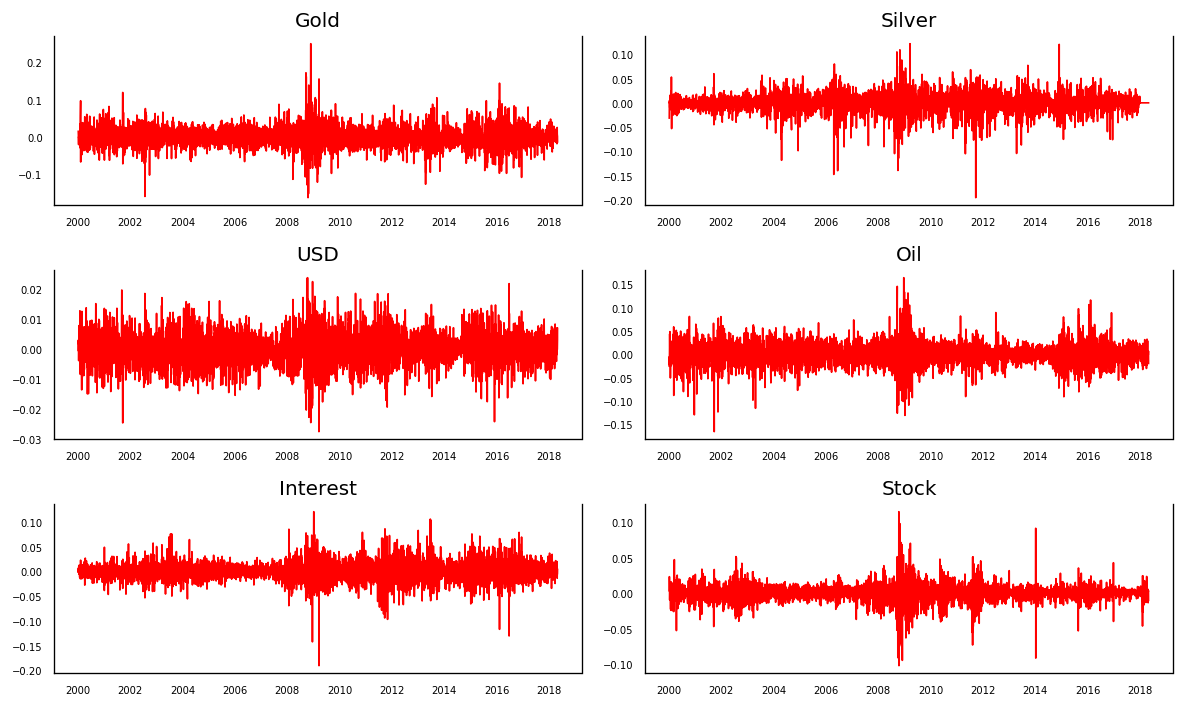

In [0]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = DATA[DATA.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(DATA.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [0]:
#from matplotlib import pyplot
#values = transform_train_data.values # recheck the plot on transformed data
# specify columns to plot
#groups = [0, 1, 2, 3, 5]
#i = 1
# plot each column
#pyplot.figure()
#for group in groups:
#	pyplot.subplot(len(groups), 1, i)
#	pyplot.plot(values[:, group])
#	pyplot.title(new_data.columns[group], y=0.5, loc='right')
#	i += 1
#pyplot.show()

### Split the Series into Training and Testing Data

The VAR model will be fitted on X_train and then used to forecast the next 15 observations. These forecasts will be compared against the actuals present in test data.
To do the comparisons, we will use multiple forecast accuracy metrics.

In [0]:
nobs = 15
X_train, X_test = DATA[0:-nobs], DATA[-nobs:]

# Check size
print(X_train.shape)  
print(X_test.shape)  

(5113, 6)
(15, 6)


In [0]:
X_train.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-05,0.014337,-0.031416,-0.000500,-0.025368,-0.001379,0.003550
2000-01-06,0.010620,-0.008352,0.002894,-0.005232,0.005658,0.010363
2000-01-07,0.003515,0.004476,0.001593,-0.022858,-0.001984,0.023419
2000-01-10,-0.021277,-0.000971,0.001491,0.018409,-0.000764,0.006717
2000-01-11,0.000000,0.000971,-0.003882,0.043623,0.009132,-0.009399


In [0]:
X_test.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2018-04-11,0.007018,0.0,-0.000302,0.019800,-0.007891,0.010352
2018-04-12,0.006197,0.0,0.002272,0.003734,0.005387,0.003956
2018-04-13,0.004623,0.0,0.000525,0.004760,0.016341,0.001690
2018-04-16,0.014499,0.0,-0.004120,-0.017514,0.009120,0.001682
2018-04-17,-0.015267,0.0,0.001043,0.004520,-0.009120,0.006249


### Testing Causation using Granger’s Causality Test
The basis behind VAR is that each of the time series in the system influences each other. That is, we can predict the series with past values of itself along with other series in the system. Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.
In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.


In [0]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    X_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in transform_train_data.columns:
        for r in X_train.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            X_train.loc[r, c] = min_p_value
    X_train.columns = [var + '_x' for var in variables]
    X_train.index = [var + '_y' for var in variables]
    return X_train

grangers_causation_matrix(X_train, variables = X_train.columns)

,Gold_x,Silver_x,USD_x,Oil_x,Interest_x,Stock_x
Gold_y,1.0000,0.0000,0.0000,0.0000,0.1127,0.0029
Silver_y,0.0065,1.0000,0.0000,0.0006,0.2525,0.0051
USD_y,0.0000,0.4620,1.0000,0.1384,0.2191,0.1474
Oil_y,0.0000,0.0019,0.0002,1.0000,0.3188,0.0140
Interest_y,0.0061,0.2922,0.0000,0.0000,1.0000,0.0072
Stock_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


The row are the Response (Y) and the columns are the predictor series (X).
- If we take the value 0.0000 in (row 1, column 2), it refers to the p-value of the Grangers Casuality test for Silver_x causing Gold_y. Whereas, the 0.0024 in (row 2, column 1) refers to the p-value of Gold_y causing Silver_x and so on.

Looking at the P-Values in the above table, except Interest and USD, we can see that all the variables (time series) in the system are interchangeably causing each other. This makes this system of multi time series a good candidate for using VAR models to forecast.

### Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

Let's define the ‘order of integration’ (d) which is the number of differencing required to make a non-stationary time series stationary. When we have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship. This is the basic premise on which Vector Autoregression(VAR) models is based on. 

In [0]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(X_train, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(X_train,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(X_train.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(X_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Gold   ::  5117.54   > 83.9383   =>   True
Silver ::  4162.84   > 60.0627   =>   True
USD    ::  3225.95   > 40.1749   =>   True
Oil    ::  2348.78   > 24.2761   =>   True
Interest ::  1514.13   > 12.3212   =>   True
Stock  ::  717.76    > 4.1296    =>   True


## VAR model

Let's see if our porposed method capable of answering the following question-
- what are the dynamic properties of these series? (own lagged coefficients)
- how do these series interact ? (cross series lagged co-efficients)

The VAR model will be fitted on Xtrain and then used to forecast the next 5 observations. These forecasts will be compared against the actuals present in test data.

In [0]:
model = VAR(X_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  -51.088151651897846
BIC :  -51.03442463080348
FPE :  6.496772383782284e-23
HQIC:  -51.06934228343477 

Lag Order = 2
AIC :  -51.10110976379717
BIC :  -51.001314473641834
FPE :  6.413129933323967e-23
HQIC:  -51.06617194417942 

Lag Order = 3
AIC :  -51.09549739302681
BIC :  -50.94961856056408
FPE :  6.449224889749109e-23
HQIC:  -51.04442545558747 

Lag Order = 4
AIC :  -51.08799750678696
BIC :  -50.896019850611665
FPE :  6.497776885328054e-23
HQIC:  -51.02078578174351 

Lag Order = 5
AIC :  -51.087014481444484
BIC :  -50.8489227119867
FPE :  6.504170272433778e-23
HQIC:  -51.00365729589645 

Lag Order = 6
AIC :  -51.084337149753246
BIC :  -50.800115969272376
FPE :  6.521611515107384e-23
HQIC:  -50.98482882767992 

Lag Order = 7
AIC :  -51.08273359578655
BIC :  -50.752367698365326
FPE :  6.532083329955923e-23
HQIC:  -50.96706845804465 

Lag Order = 8
AIC :  -51.08469061465484
BIC :  -50.70816468619332
FPE :  6.519319906082511e-23
HQIC:  -50.95286297897616 

Lag Order 

Here we can see that AIC is almost simiar to any lag from 4-12. So, we can take any lag between 4-12, which will produce the same result. We will use 4.

In [0]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Oct, 2019
Time:                     10:38:47
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -50.8960
Nobs:                     5109.00    HQIC:                  -51.0208
Log likelihood:           87158.1    FPE:                6.49778e-23
AIC:                     -51.0880    Det(Omega_mle):     6.31023e-23
--------------------------------------------------------------------
Results for equation Gold
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000203         0.000342           -0.594           0.552
L1.Gold            -0.176169         0.015542          -11.335           0.000
L1.Silver           0.304949         0.021489           14.191       

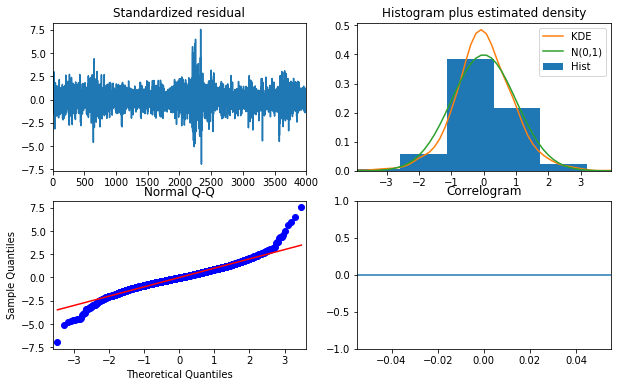

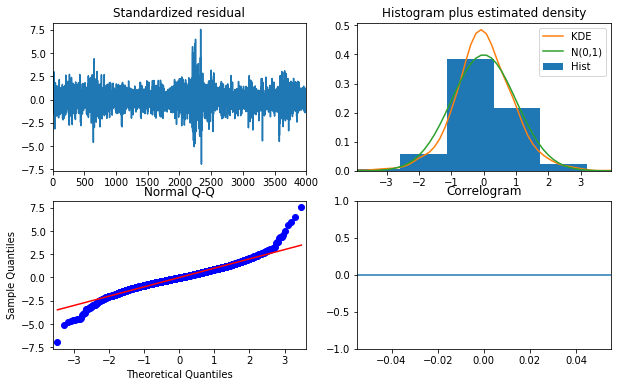

In [0]:
model_result.plot_diagnostics()

### Durbin Watson Statistic

Checking for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.
So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

In [0]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(X_train.columns, out):
    print((col), ':', round(val, 2))

Gold : 2.0
Silver : 2.0
USD : 2.0
Oil : 2.0
Interest : 2.0
Stock : 2.0


The serial correlation looks alright. Let’s proceed with the forecast.

## Forecast 
In order to forecast, the VAR model expects up to the lag order number of observations from the past data. This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so we need to provide as many of the previous values as indicated by the lag order used by the model.

In [0]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = X_train.values[-lag_order:]
forecast_input

4


array([[-1.51942147e-02,  0.00000000e+00,  4.12367135e-03,
         2.67906551e-03,  2.15293569e-02,  2.37369798e-02],
       [ 1.99448175e-02,  0.00000000e+00, -4.13480938e-03,
        -2.35679698e-02,  7.09723238e-04, -6.55618095e-05],
       [ 2.36686501e-03,  0.00000000e+00, -2.76606837e-03,
         2.16776101e-02, -1.03406163e-02, -7.91667129e-03],
       [ 7.06716722e-03,  0.00000000e+00, -2.84094278e-03,
         3.24235336e-02,  3.22061470e-03, -2.61204577e-03]])

In [0]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index = X_train.index[-nobs:], columns= X_train.columns)
df_forecast

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2018-03-20,0.001888,0.001446,-0.000132,-0.000872,0.002305,0.005329
2018-03-21,0.000558,-0.000943,-0.000014,-0.001036,0.000380,0.000609
2018-03-22,-0.000354,0.000364,-0.000203,0.001165,0.000388,-0.000299
2018-03-23,-0.000305,0.000224,0.000007,0.000794,-0.000294,0.000666
2018-03-26,-0.000131,0.000169,-0.000009,0.000012,-0.000204,0.000216
2018-03-27,-0.000079,0.000203,0.000002,0.000132,-0.000199,0.000037
2018-03-28,-0.000098,0.000236,-0.000024,0.000265,-0.000167,0.000110
2018-03-29,-0.000069,0.000239,-0.000025,0.000194,-0.000157,0.000123
2018-04-02,-0.000057,0.000235,-0.000023,0.000180,-0.000166,0.000114


### Invert the transformation to get the real forecast
The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, we need to de-difference it.

This is equivalent to log(yt) - log(y(t-1)) = log(yt/y(t-1))

Define z = log(yt) - log(y(t-1))

Then, log(yt) = z + log(y(t-1))

yt = e (z+log(y(t-1)) = ez(y(t-1))

so, we have the forecast y(T+s) = ez(y(t-1) +s), where s>1


In [0]:
def invert_transformation(X_train, df_forecast, diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = X_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = X_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc
  
df_results = invert_transformation(X_train, df_forecast, diff=True)        
df_results.loc[:, ['Gold','Silver']]

,Gold,Silver
Date,,
2018-03-20,0.001888,0.001446
2018-03-21,0.000558,-0.000943
2018-03-22,-0.000354,0.000364
2018-03-23,-0.000305,0.000224
2018-03-26,-0.000131,0.000169
2018-03-27,-0.000079,0.000203
2018-03-28,-0.000098,0.000236
2018-03-29,-0.000069,0.000239
2018-04-02,-0.000057,0.000235


In [0]:
predictions = np.expm1(df_results)

### Plot of Forecast vs Actuals

The forecasts are back to the original scale. Let’s plot the forecasts against the actuals from test data.

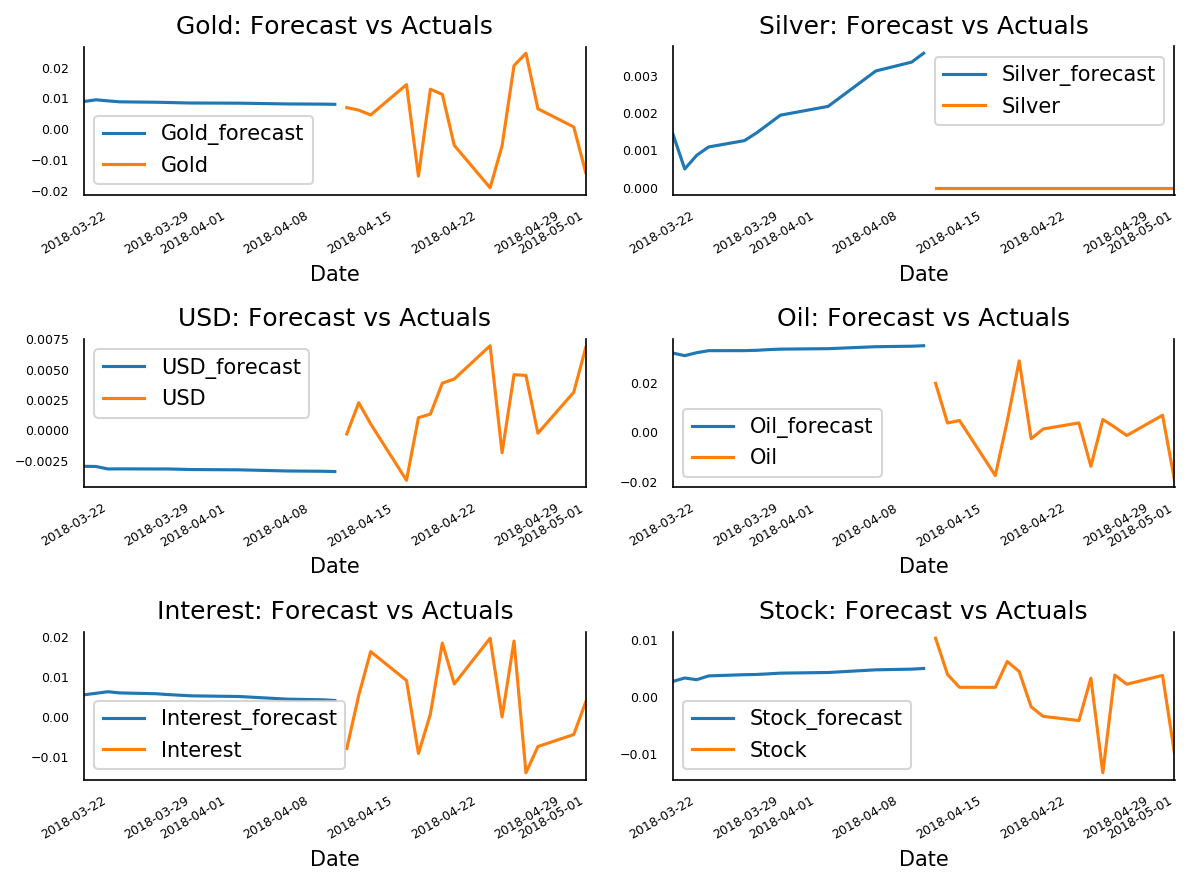

In [0]:
fig, axes = plt.subplots(nrows=int(len(X_train.columns)/2), ncols=2, dpi=150, figsize=(8,6))
for i, (col,ax) in enumerate(zip(predictions.columns, axes.flatten())):
    predictions[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    X_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Evaluate the Forecasts
To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

In [0]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(predictions['Oil_forecast'].values, X_test['Oil'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Gold')
accuracy_prod = forecast_accuracy(predictions['Gold_forecast'].values, X_test['Gold'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: Oil
mape :  8.5386
me :  0.0317
mae :  0.0317
mpe :  1.864
rmse :  0.0341
corr :  -0.3497
minmax :  0.9436

Forecast Accuracy of: Gold
mape :  1.6093
me :  0.0052
mae :  0.0108
mpe :  0.011
rmse :  0.0136
corr :  0.1157
minmax :  1.0925


In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_test.Gold, predictions.Gold)

0.011110248623169217

In [0]:
mean_absolute_error(X_test.Oil, predictions.Oil)

0.009125499640184298

# LSTM (Long Short-Term Memory network) 
LSTM is a type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account.



In [0]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
# Sort DataFrame by date
new_data = new_data.sort_values('Date')

# Double check the result
print(new_data.head())

               Gold  Silver     USD    Oil  Interest        Stock
Date                                                             
2000-01-04  17.3125   5.335  100.10  25.55     6.530  6543.759766
2000-01-05  17.5625   5.170  100.05  24.91     6.521  6567.029785
2000-01-06  17.7500   5.127  100.34  24.78     6.558  6635.439941
2000-01-07  17.8125   5.150  100.50  24.22     6.545  6792.669922
2000-01-10  17.4375   5.145  100.65  24.67     6.540  6838.450195


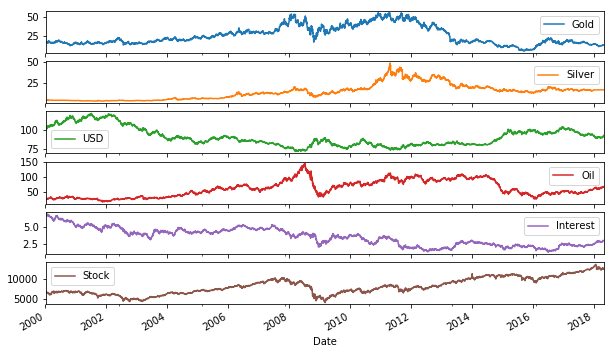

In [0]:
new_data.plot(subplots=True)
plt.show()

the first step will be to normalize the dataset using the mean and standard deviation of the training data.

In [0]:
new_data.info() # sanity check to ensure no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5129 entries, 2000-01-04 to 2018-05-01
Data columns (total 6 columns):
Gold        5129 non-null float64
Silver      5129 non-null float64
USD         5129 non-null float64
Oil         5129 non-null float64
Interest    5129 non-null float64
Stock       5129 non-null float64
dtypes: float64(6)
memory usage: 280.5 KB


In [0]:
new_data.describe()

,Gold,Silver,USD,Oil,Interest,Stock
count,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,25.828860,15.568923,89.816626,63.304623,3.401824,8334.626862
std,12.218568,9.040567,11.766908,27.212318,1.241670,2015.185376
min,6.080000,4.026000,71.304000,17.450000,1.336000,4226.310059
25%,16.379999,7.048000,80.576000,40.450000,2.297000,6766.759766
50%,20.700001,15.734000,86.582000,59.820000,3.375000,8079.240234
75%,34.980000,19.307000,96.670000,87.960000,4.381000,10068.959960
max,55.540001,48.584000,121.210000,145.290000,6.781000,13592.799810


### Normalizing the Data
As a rule of thumb, whenever you use a neural network, we should normalize or scale your data between 0 and 1 for optimal performance. The feature_range parameter is used to specify the range of the scaled data. 

### Convert Training Data to Right Shape (Creating Data with Timesteps)
LSTMs expect our data to be in a specific format, usually a 3D array.
In a time series problems, we have to predict a value at time T, based on the data from days T-N where N can be any number of steps. In this article, we are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days. I have tried and tested different numbers and found that the best results are obtained when past 60 time steps are used. You can try different numbers and see how your algorithm performs.We convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

Our feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day. Execute the following script to create feature and label set.

### Training The LSTM
We have preprocessed our data and have converted it into the desired format. now is the time to create our LSTM. The LSTM model that we are going to create will be a sequential model with multiple layers. We will add four LSTM layers to our model followed by a dense layer that predicts the future stock price.

As we see above, the data taken on daily basis. This means that, we will have 252 observations in a year. 

Given a specific time, let's say we want to predict the future 15 days stock. In order to make this prediction, we choose to last 15 years of observations. Thus, we would create a window containing the last 15 years (15x252) observations to train the model. Many such configurations are possible, making this dataset a good one to experiment with.

The function below returns the above described windows of time for the model to train on. The parameter history_size is the size of the past window of information. The target_size is how far in the future does the model need to learn to predict. The target_size is the label that needs to be predicted.


## LSTMs: Making Stock Movement Predictions Far into the Future
Long Short-Term Memory models are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. An LSTM module (or cell) has 5 essential components which allows it to model both long-term and short-term data.

- Cell state (ct) - This represents the internal memory of the cell which stores both short term memory and long-term memories
- Hidden state (ht) - This is output state information calculated w.r.t. current input, previous hidden state and current cell input which you eventually use to predict the future stock market prices. Additionally, the hidden state can decide to only retrive the short or long-term or both types of memory stored in the cell state to make the next prediction.
- Input gate (it) - Decides how much information from current input flows to the cell state
- Forget gate (ft) - Decides how much information from the current input and the previous cell state flows into the current cell state
- Output gate (ot) - Decides how much information from the current cell state flows into the hidden state, so that if needed LSTM can only pick the long-term memories or short-term memories and long-term memories

We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the following arguments:

- 50 units which is the dimensionality of the output space
- return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence
- input_shape as the shape of our training set.
- When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped. 
- Thereafter, we add the Dense layer that specifies the output of 1 unit. 
- After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. 
- Next, we fit the model to run on 100 epochs with a batch size of 32. 

#### Backtesting the Model
Now that we have fitted our models using our training data and evaluated it using our test data, we can take the assessment a step further by backtesting the model on new data. This is done simply by

### Predicting Future Stock using the Test Set
 
First we need to import the test set that we’ll use to make our predictions on.

In order to predict future stock prices we need to do a couple of things after loading in the test set:

- Merge the training set and the test set on the 0 axis.
- Set the time step as 60 (as seen previously)
- Use MinMaxScaler to transform the new dataset
- Reshape the dataset as done previously
- After making the predictions we use inverse_transform to get back the stock prices in normal readable format.

### Data stadardization
To ensure that there is no bias while training the model due to the different scales of all input features.

#### Data scaling
Most neural network architectures benefit from scaling the inputs (sometimes also the output). Why? Because most common activation functions of the network’s neurons such as tanh or sigmoid are defined on the [-1, 1] or [0, 1] interval respectively. Nowadays, rectified linear unit (ReLU) activations are commonly used activations which are unbounded on the axis of possible activation values.

In [0]:
#dataset = np.log(new_data).diff(1)

In [0]:
# Add to predict column (adjusted close) and shift it. This is our output
#transform = np.log(new_data).diff(1)
# Remove NaN on the final sample (because we don't have tomorrow's output)
#transform = transform.dropna()

In [0]:
# Add to predict column and shift it. This is our output
new_data['pred'] = new_data.Oil.shift(-1)
# Remove NaN on the final sample (because we don't have tomorrow's output)
new_data = new_data.dropna()
print(new_data.head())

               Gold  Silver     USD    Oil  Interest        Stock   pred
Date                                                                    
2000-01-04  17.3125   5.335  100.10  25.55     6.530  6543.759766  24.91
2000-01-05  17.5625   5.170  100.05  24.91     6.521  6567.029785  24.78
2000-01-06  17.7500   5.127  100.34  24.78     6.558  6635.439941  24.22
2000-01-07  17.8125   5.150  100.50  24.22     6.545  6792.669922  24.67
2000-01-10  17.4375   5.145  100.65  24.67     6.540  6838.450195  25.77


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

num_features = 6 #Number of features in the dataset
lag_steps = 1 #Number of lagged time features to be generated

print(new_data.shape) # Used for debugging
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_scaled = scaler.fit_transform(new_data) # Scaling all values

(5127, 7)


In [0]:
split = int(new_data_scaled.shape[0]*0.8) # Splitting for traning and testing
train = new_data_scaled[:split, :]
test = new_data_scaled[split:, :]

train_X, train_y = train[:, :-1], train[:, -1] # The pred column is separated out
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape) # Used for debugging
print(test_X.shape) # Used for debugging

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) # Reshaping done for LSTM as it need 3D input
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape) # Used for debugging
print(test_X.shape) # Used for debugging

(4101, 6)
(1026, 6)
(4101, 1, 6)
(1026, 1, 6)


In [42]:
from pandas import DataFrame
from numpy import concatenate
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4101 samples, validate on 1026 samples
Epoch 1/100
4101/4101 - 9s - loss: 0.0177 - val_loss: 0.1066
Epoch 2/100
4101/4101 - 2s - loss: 0.0415 - val_loss: 0.1056
Epoch 3/100
4101/4101 - 2s - loss: 0.0390 - val_loss: 0.0872
Epoch 4/100
4101/4101 - 2s - loss: 0.0248 - val_loss: 0.0338
Epoch 5/100
4101/4101 - 2s - loss: 0.0078 - val_loss: 0.0074
Epoch 6/100
4101/4101 - 2s - loss: 0.0085 - val_loss: 0.0053
Epoch 7/100
4101/4101 - 2s - loss: 0.0073 - val_loss: 0.0051
Epoch 8/100
4101/4101 - 2s - loss: 0.0070 - val_loss: 0.0058
Epoch 9/100
4101/4101 - 2s - loss: 0.0067 - val_loss: 0.0052
Epoch 10/100
4101/4101 - 2s - loss: 0.0059 - val_loss: 0.0052
Epoch 11/100
4101/4101 - 2s - loss: 0.0060 - val_loss: 0.0038
Epoch 12/100
4101/4101 - 2s - loss: 0.0057 - val_loss: 0.0038
Epoch 13/100
4101/4101 - 2s - loss: 0.0054

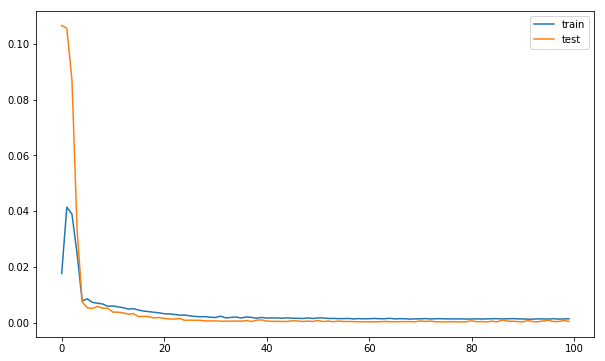

In [0]:
# Initialising the RNN
model = tf.keras.Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 50))
model.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(train_X, train_y, epochs = 100, batch_size = 32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plotting the training progression
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# Using the trained model to predict the label values in test dataset
yhat = model.predict(test_X)

print(yhat.shape) # Used for debugging
print(test_X.shape) # Used for debugging

# Reshaping back into 2D for inversing the scaling
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2])) 
print(test_X.shape) # Used for debugging

(1026, 1)
(1026, 1, 6)
(1026, 6)


In [0]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [0]:
import sklearn.metrics, math
from math import sqrt
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(inv_y, inv_yhat))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(inv_y, inv_yhat))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(inv_y, inv_yhat)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(inv_y, inv_yhat))



Mean absolute error (MAE):      0.911462
Mean squared error (MSE):       1.210370
Root mean squared error (RMSE): 1.100168
R square (R^2):                 0.868778


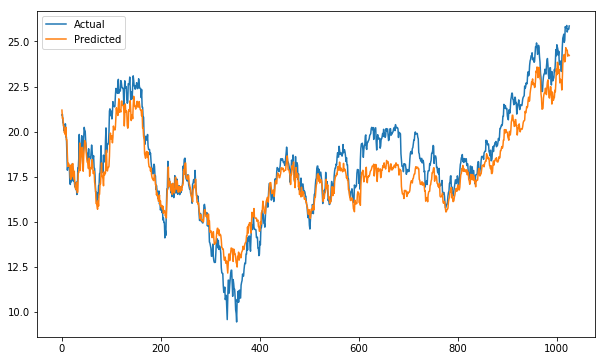

In [0]:
plt.plot(inv_y, label = 'Actual')
plt.plot(inv_yhat, label = 'Predicted')
plt.legend()
plt.show()

Now we can see, the results are ok, though not superb. The prediction values are exactly the same as the target value and moving in the same direction as we expect. We can check the difference between these two and compare the results in various ways & optimize the model before we build your trading strategy. 

Another important factor, we have used daily prices in this model so the data points are really less only 5,129 data points. My advice is to use more than 100,000 data points (use minute or tick data) for training the model when we are building Artificial Neural Network or any other Deep Learning model that will be most effective. 

In [19]:
print(new_data.head())

               Gold  Silver     USD    Oil  Interest        Stock
Date                                                             
2000-01-04  17.3125   5.335  100.10  25.55     6.530  6543.759766
2000-01-05  17.5625   5.170  100.05  24.91     6.521  6567.029785
2000-01-06  17.7500   5.127  100.34  24.78     6.558  6635.439941
2000-01-07  17.8125   5.150  100.50  24.22     6.545  6792.669922
2000-01-10  17.4375   5.145  100.65  24.67     6.540  6838.450195


In [20]:
new_data.values.shape

(5129, 6)

In [0]:
target_names = ['Oil']

In [0]:
new_data_targets = new_data[target_names].shift(-10)

In [23]:
new_data[target_names].head(10 + 5) # sanity check

,Oil
Date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-10,24.67
2000-01-11,25.77
2000-01-12,26.28
2000-01-13,26.69
2000-01-14,28.02


The following is the firest 5 rows of the time shifted data-frame. This should be identical of the last 5 rows of the above data set, except for the time-stamp.

In [24]:
new_data_targets.head() # sanity check

,Oil
Date,
2000-01-04,29.54
2000-01-05,29.66
2000-01-06,28.20
2000-01-07,27.83
2000-01-10,28.28


Time-shifted data-frame has sthe same length as the priginal data-frame, but the last observations are NaN because the data has been shifted backwards; so, we are trying to shift data that do not exist in the original data-frame.

In [25]:
new_data_targets.tail()

,Oil
Date,
2018-04-25,NaN
2018-04-26,NaN
2018-04-27,NaN
2018-04-30,NaN
2018-05-01,NaN


So, we have two data

#### Below are input signals

In [26]:
x_data = new_data.values[0:-60]
print(type(x_data))
print('Shape:', x_data.shape)

<class 'numpy.ndarray'>
Shape: (5069, 6)


In [27]:
y_data = new_data_targets.values[: -60]
print(type(y_data))
print('Shape:', y_data.shape)

<class 'numpy.ndarray'>
Shape: (5069, 1)


In [28]:
num_data = len(x_data)
num_data

5069

In [0]:
train_split = 0.8 # fraction of dataset will be used for training

In [30]:
num_train = int(train_split * num_data) # number of observations in training set
num_train

4055

In [31]:
num_test = num_data - num_train # number of observations in test set
num_test

1014

In [32]:
# input-signals for the training- and test-sets:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

5069

In [33]:
# output-signals for the training- and test-sets:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

5069

In [34]:
num_x_signals = x_data.shape[1] #number of input-signals:
num_x_signals

6

In [35]:
num_y_signals = y_data.shape[1] #number of output-signal
num_y_signals

1

### Scaled Data
The data-set contains a wide range of values:

In [36]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 1.4040000000000001
Max: 11315.37012


The neural network works best on values roughly between -1 and 1, so we need to scale the data before it is being input to the neural network. We can use scikit-learn for this.

We first create a scaler-object for the input-signals.

In [37]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

#detect the range of values from the training-data and scale the training-data
x_train_scaled = x_scaler.fit_transform(x_train)

print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [0]:
x_test_scaled = x_scaler.transform(x_test)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Data Generator
The data-set has now been prepared as 2-dimensional numpy arrays. These are the array-shapes of the input and output data:

In [39]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(4055, 6)
(4055, 1)


In [0]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

Instead of training the Recurrent Neural Network on the complete sequences of 5000 observations, we will use the following function to create a batch of shorter sub-sequences picked at random from the training-data.

(256, 252, 6)
(256, 252, 1)


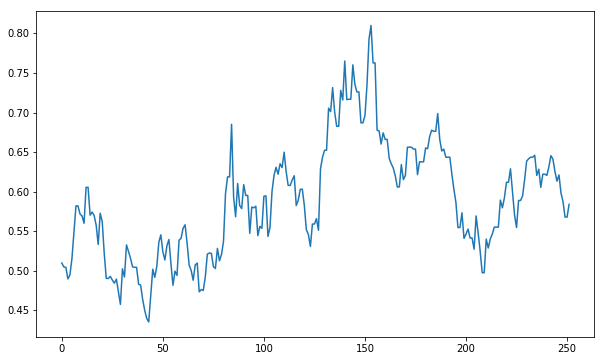

In [0]:
batch_size = 256
sequence_length = 252

# create the batch-generator
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

# test the batch-generator to see if it works
x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

# plot one of the 6 input-signals as an example.
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 6 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)
plt.show()

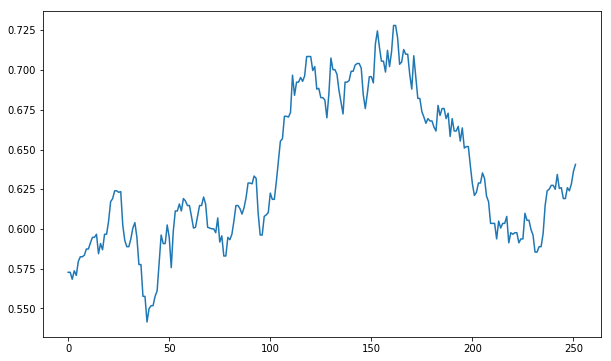

In [0]:
# plot one of the output-signals that we want the model to learn how to predict given all those 6 input signals.
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [40]:
x_train_scaled = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1])) # Reshaping done for LSTM as it need 3D input
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
print(x_train_scaled.shape) # Used for debugging
print(x_test_scaled.shape) # Used for debugging

(4055, 1, 6)
(1014, 1, 6)


### Validation Set
The neural network trains quickly so we can easily run many training epochs. But then there is a risk of overfitting the model to the training-set so it does not generalize well to unseen data. We will therefore monitor the model's performance on the test-set after each epoch and only save the model's weights if the performance is improved on the test-set.

The batch-generator randomly selects a batch of short sequences from the training-data and uses that during training. But for the validation-data we will instead run through the entire sequence from the test-set and measure the prediction accuracy on that entire sequence.

In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

## Recurrent Neural Network (LSTM)

In [0]:
# Initialising the RNN
model = tf.keras.Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True, input_shape = (x_train_scaled.shape[1], x_train_scaled.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512))
model.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1, activation='relu'))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 1, 512)            1062912   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 1, 512)            2099200   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 1, 512)            2099200   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 512)              

Train on 4055 samples, validate on 1014 samples
Epoch 1/100
4055/4055 - 8s - loss: 0.0587 - val_loss: 0.2894
Epoch 2/100
4055/4055 - 0s - loss: 0.1770 - val_loss: 0.0106
Epoch 3/100
4055/4055 - 0s - loss: 0.0660 - val_loss: 0.0093
Epoch 4/100
4055/4055 - 0s - loss: 0.0281 - val_loss: 0.0568
Epoch 5/100
4055/4055 - 0s - loss: 0.0368 - val_loss: 0.0097
Epoch 6/100
4055/4055 - 0s - loss: 0.0150 - val_loss: 0.0022
Epoch 7/100
4055/4055 - 0s - loss: 0.0123 - val_loss: 0.0459
Epoch 8/100
4055/4055 - 0s - loss: 0.0117 - val_loss: 0.0081
Epoch 9/100
4055/4055 - 0s - loss: 0.0088 - val_loss: 0.0518
Epoch 10/100
4055/4055 - 0s - loss: 0.0071 - val_loss: 0.0163
Epoch 11/100
4055/4055 - 0s - loss: 0.0073 - val_loss: 0.0551
Epoch 12/100
4055/4055 - 0s - loss: 0.0049 - val_loss: 0.0236
Epoch 13/100
4055/4055 - 0s - loss: 0.0058 - val_loss: 0.0480
Epoch 14/100
4055/4055 - 0s - loss: 0.0039 - val_loss: 0.0321
Epoch 15/100
4055/4055 - 0s - loss: 0.0040 - val_loss: 0.0367
Epoch 16/100
4055/4055 - 0s - l

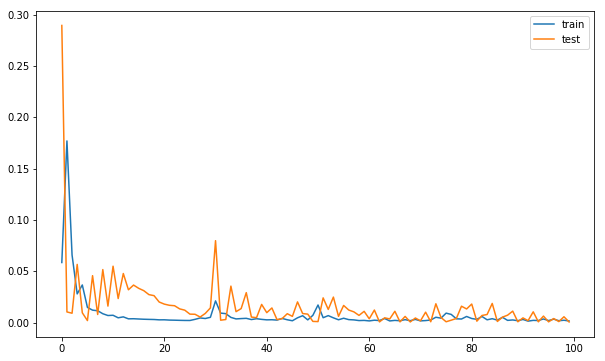

In [0]:
# Fitting the RNN to the Training set
history = model.fit(x_train_scaled, y_train_scaled, epochs = 100, batch_size = 256, validation_data=(x_test_scaled, y_test_scaled), verbose=2, shuffle=False)

# Plotting the training progression
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# Using the trained model to predict the label values in test dataset
y_pred = model.predict(x_test_scaled)

print(y_pred.shape) # Used for debugging
print(x_test_scaled.shape) # Used for debugging

# Reshaping back into 2D for inversing the scaling
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], x_test_scaled.shape[2])) 
print(x_test_scaled.shape) # Used for debugging

(1014, 1)
(1014, 1, 6)
(1014, 6)


In [0]:
y_pred_rescaled = y_scaler.inverse_transform(y_pred)
y_test_rescaled = y_scaler.inverse_transform(y_test_scaled)

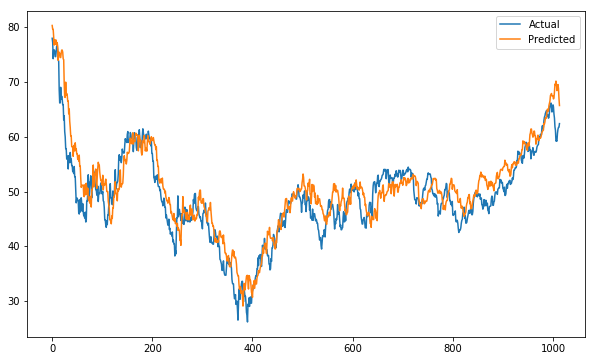

In [0]:
plt.plot(y_test_rescaled, label = 'Actual')
plt.plot(y_pred_rescaled, label = 'Predicted')
plt.legend()
plt.show()

### Loss Function
We will use Mean Squared Error (MSE) as the loss-function that will be minimized. This measures how closely the model's output matches the true output signals.

However, at the beginning of a sequence, the model has only seen input-signals for a few time-steps, so its generated output may be very inaccurate. Using the loss-value for the early time-steps may cause the model to distort its later output. We therefore give the model a "warmup-period" of 50 time-steps where we don't use its accuracy in the loss-function, in hope of improving the accuracy for later time-steps.

In [46]:
# Initialising the RNN
model = tf.keras.Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True, input_shape = (x_train_scaled.shape[1], x_train_scaled.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 512))
model.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 512)            1062912   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 512)            2099200   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 512)            2099200   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 512)              

Train: 0.001, Test: 0.000


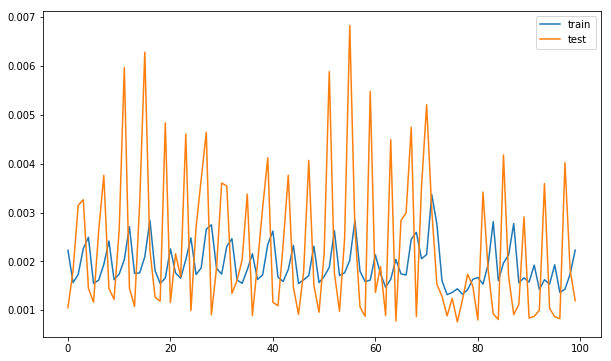

In [49]:
# fit model
history = model.fit(x_train_scaled, y_train_scaled, epochs = 100, batch_size = 256, validation_data=(x_test_scaled, y_test_scaled), verbose=0, shuffle=False)

# evaluate the model
_, train_acc = model.evaluate(x_train_scaled, y_train_scaled, verbose=0)
_, test_acc = model.evaluate(x_test_scaled, y_test_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plotting the training progression
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()